In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data(path):
    input_file = open(path)
    output_data = []
    for line in input_file:
        one_row = line[:-2].split(',')
        output_data.append([float(one_row[0]), float(one_row[1])])
    return np.array(output_data)

In [3]:
def display_convergence(data):
    descent_plot_data = np.array(data)
    descent_plot = plt.figure().add_subplot(111)
    plt.xlabel('Iteration, N')
    plt.ylabel('Cost function, J')
    plt.title('Cost function convergence')
    descent_plot.plot(descent_plot_data[:, 0], descent_plot_data[:, 1])

In [4]:
def display_regression(data, hypothesis=None):
    x_data = data[:, 0]
    y_data = data[:, 1]
    plot_regression = plt.figure().add_subplot(111)
    plot_regression.scatter(x_data, y_data, s=10)
    plt.xlabel('Population size, 10.000')
    plt.ylabel('Profit, $10.000')
    plt.title('Linear regression')
    if hypothesis is not None:
        plot_regression.plot(x_data, hypothesis, color='red')
    plt.show()

In [5]:
def hyp_value(x, theta):
    return theta[0] + x * theta[1]

In [6]:
def compare_theta(a, b):
    delta = 0.000001
    return True if abs(a[0] - b[0]) < delta and abs(a[1] - b[1]) < delta else False

In [7]:
def compute_cost_function(x_data, y_data, theta):
    coefficient = 0.5 / len(x_data)
    hyp_data = np.array([hyp_value(x, theta) for x in x_data])
    return sum(((y_data - hyp_data) ** 2)) * coefficient

In [8]:
def compute_partial_derivative(func, theta, theta_zero=False):
    result = 0.0
    for key in func:
        temp_sum = hyp_value(key, theta) - func[key]
        result += temp_sum if theta_zero else temp_sum * key

    return result / len(func)

In [9]:
def gradient_step(func, theta, alpha):
    theta_zero = theta[0] - alpha * compute_partial_derivative(func, theta, True)
    theta_one = theta[1] - alpha * compute_partial_derivative(func, theta)
    theta[0] = theta_zero
    theta[1] = theta_one
    return theta

In [10]:
def gradient_descent(x_data, y_data, theta, alpha, iterations):
    temp_dict = dict(zip(x_data, y_data))
    prev_theta = list(theta)
    convergence_plot_data = []
    for i in range(1, iterations):
        theta = gradient_step(temp_dict, theta, alpha)
        if compare_theta(prev_theta, theta):
            print('Estimate iterations: %d' % i)
            break

        prev_theta = list(theta)
        convergence_plot_data.append([i, compute_cost_function(x_data, y_data, theta)])

    display_convergence(convergence_plot_data)
    return theta

For theta [0, 0] expected cost function result: 32.0
For theta [0, 0] computed cost function result: 31.3209
For theta [-1, 2] expected cost function result: 54.5
For theta [-1, 2] computed cost function result: 55.3490
Started gradient descent with theta zero: 0.4438, theta one: 0.6350
Expected theta zero: -3.6303, theta one: 1.1664 (approximately)


Estimate iterations: 4982
Computed theta zero: -3.9803, theta one: 1.1894


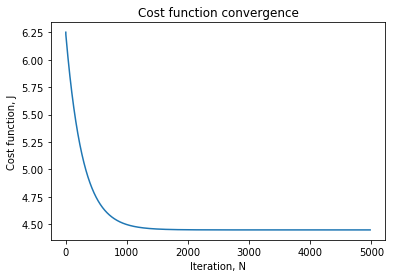

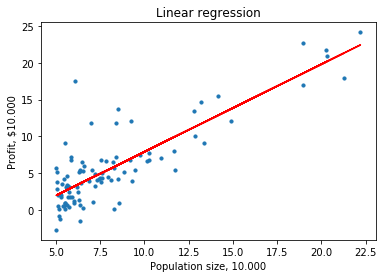

In [11]:
import random


def compute_linear_regression():
    # loading exercise data
    import os
    data = load_data(os.path.abspath('demo/init/data/ex1data1.txt'))

    # getting separated x and y data for descent and cost function
    x_data = data[:, 0]
    y_data = data[:, 1]

    # testing compute_cost function
    print('For theta [0, 0] expected cost function result: 32.0')
    print('For theta [0, 0] computed cost function result: %.4f' % compute_cost_function(x_data, y_data, [0, 0]))
    print('For theta [-1, 2] expected cost function result: 54.5')
    print('For theta [-1, 2] computed cost function result: %.4f' % compute_cost_function(x_data, y_data, [-1, 2]))

    # generating random start theta (or coefficients on linear regression)
    theta = [random.uniform(0, 1), random.uniform(0, 1)]

    # descent speed
    # alpha should be between 0.005 and 0.2, or cost function will not converge
    # if alpha > 0.2 cost function will increase instead of decrease
    # if alpha < 0.005 cost function will never converge faster then in 10.000 iteration
    alpha = 0.01

    # if cost function not converged, descent will stop after all iterations
    iterations = 10000

    # computing gradient descent
    print('Started gradient descent with theta zero: %.4f, theta one: %.4f' % (theta[0], theta[1]))
    print('Expected theta zero: %.4f, theta one: %.4f (approximately)' % (-3.6303, 1.1664))
    theta = gradient_descent(x_data, y_data, theta, alpha, iterations)
    print('Computed theta zero: %.4f, theta one: %.4f' % (theta[0], theta[1]))

    # displaying results
    display_regression(data, [hyp_value(x, theta) for x in x_data])

compute_linear_regression()